# 14. Data visualizations

## Setup

In [1]:
incidents_selected_file <- '../preprocessed_data/incidents_renamed_2019-08-21.feather'

In [2]:
library(tidyverse)
library(lubridate)
library(ggmap)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


In [3]:
key <- readChar('../maps_key.txt', file.info('../maps_key.txt')$size)
register_google(key=key)

In [4]:
incidents <- feather::read_feather(incidents_selected_file)
incidents$YEAR <- year(incidents$LOCAL_DATETIME)
glimpse(incidents)

Warning message:
“Coercing int64 to double”

Observations: 3,819
Variables: 9
$ OPERATOR_ID        <chr> "22610", "31672", "32035", "1845", "300", "31684",…
$ LOCAL_DATETIME     <dttm> 2010-02-16 02:42:00, 2010-03-01 06:50:00, 2010-02…
$ NAME               <chr> "MAGELLAN PIPELINE COMPANY, LP", "CHAPARRAL ENERGY…
$ COMMODITY          <chr> "non-hvl", "co2", "hvl", "non-hvl", "crude", "non-…
$ SERIOUS            <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ SIGNIFICANT        <lgl> FALSE, FALSE, TRUE, FALSE, FALSE, FALSE, TRUE, TRU…
$ LOCATION_LATITUDE  <dbl> 41.94352, 37.10847, 32.22471, 40.60860, 31.13284, …
$ LOCATION_LONGITUDE <dbl> -88.23353, -100.80037, -101.40440, -74.23990, -101…
$ YEAR               <dbl> 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 20…


## 14.1 Visualize incident locations (US)

In [5]:
map <- get_map("united states", zoom = 4, source = "stamen", maptype = "toner-lite", crop = FALSE)

significant_incidents <- subset(incidents, SIGNIFICANT == TRUE)

Source : https://maps.googleapis.com/maps/api/staticmap?center=united%20states&zoom=4&size=640x640&scale=2&maptype=terrain&key=xxx-hoo6w1-zxo
Source : https://maps.googleapis.com/maps/api/geocode/json?address=united+states&key=xxx-hoo6w1-zxo
Source : http://tile.stamen.com/toner-lite/4/2/4.png
Source : http://tile.stamen.com/toner-lite/4/3/4.png
Source : http://tile.stamen.com/toner-lite/4/4/4.png
Source : http://tile.stamen.com/toner-lite/4/2/5.png
Source : http://tile.stamen.com/toner-lite/4/3/5.png
Source : http://tile.stamen.com/toner-lite/4/4/5.png
Source : http://tile.stamen.com/toner-lite/4/2/6.png
Source : http://tile.stamen.com/toner-lite/4/3/6.png
Source : http://tile.stamen.com/toner-lite/4/4/6.png
Source : http://tile.stamen.com/toner-lite/4/2/7.png
Source : http://tile.stamen.com/toner-lite/4/3/7.png
Source : http://tile.stamen.com/toner-lite/4/4/7.png


Warning message:
“Ignoring unknown parameters: scatter”Warning message:
“Removed 8 rows containing missing values (geom_point).”

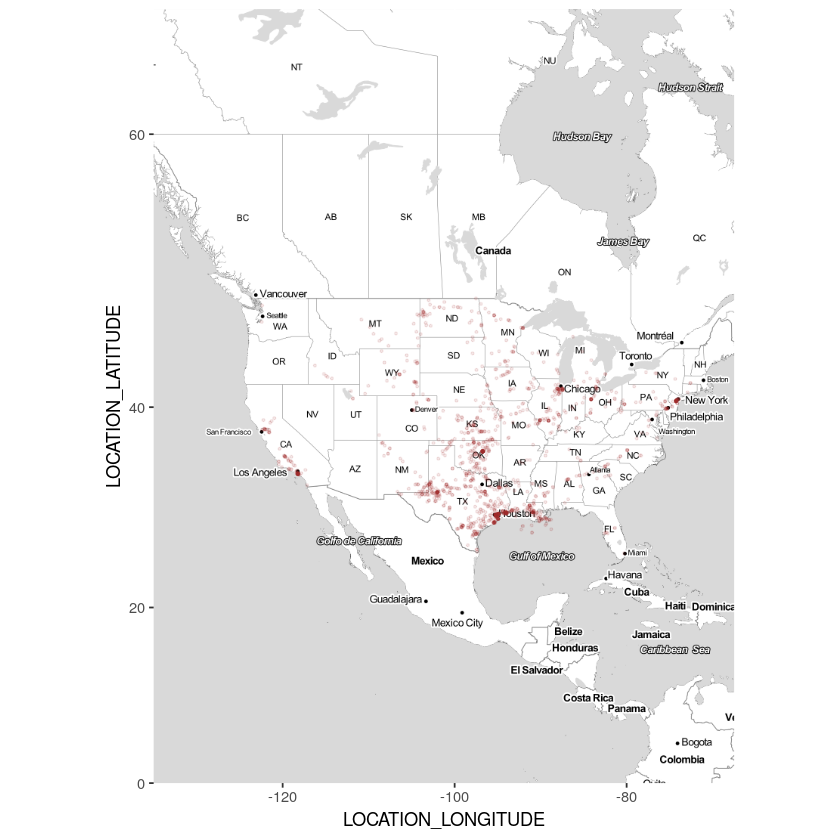

In [6]:
ggmap(map, base_layer = ggplot(significant_incidents, aes(LOCATION_LONGITUDE, LOCATION_LATITUDE))) +
    geom_point(size = 0.5, alpha = 0.1, scatter=0.5, color = "brown")

Warning message:
“Ignoring unknown parameters: scatter”Warning message:
“Removed 8 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 8 rows containing missing values (geom_point).”

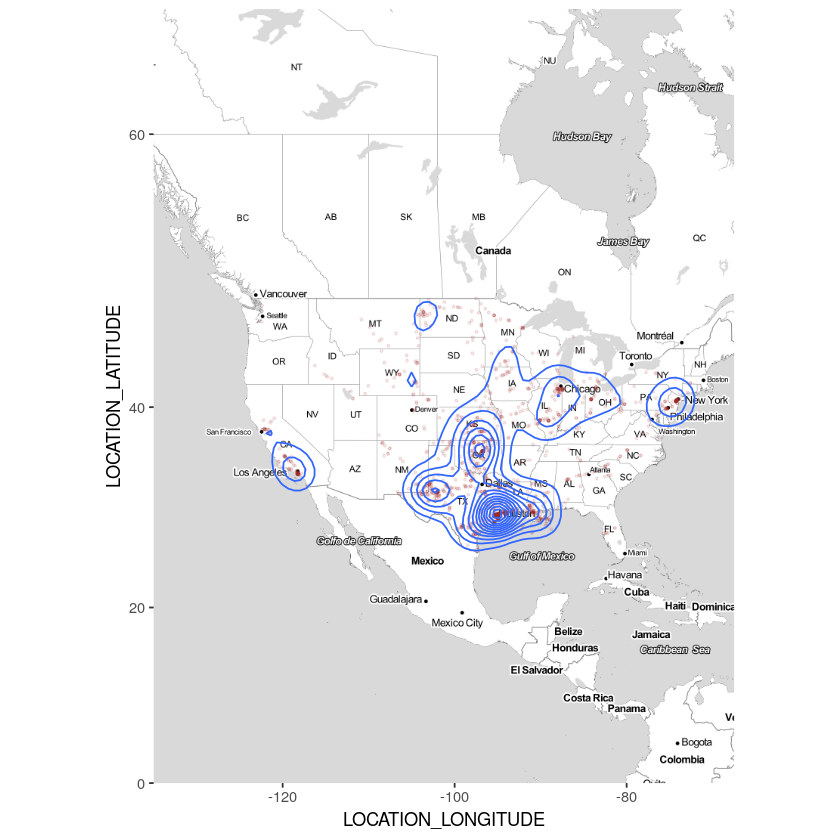

In [7]:
ggmap(map, base_layer = ggplot(significant_incidents, aes(LOCATION_LONGITUDE, LOCATION_LATITUDE))) +
    geom_point(size = 0.5, alpha = 0.1, scatter=0.5, color = "brown") +
    geom_density2d()

Warning message:
“Ignoring unknown parameters: scatter”Warning message:
“Ignoring unknown parameters: rows, ncol”Warning message:
“Removed 8 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 8 rows containing missing values (geom_point).”

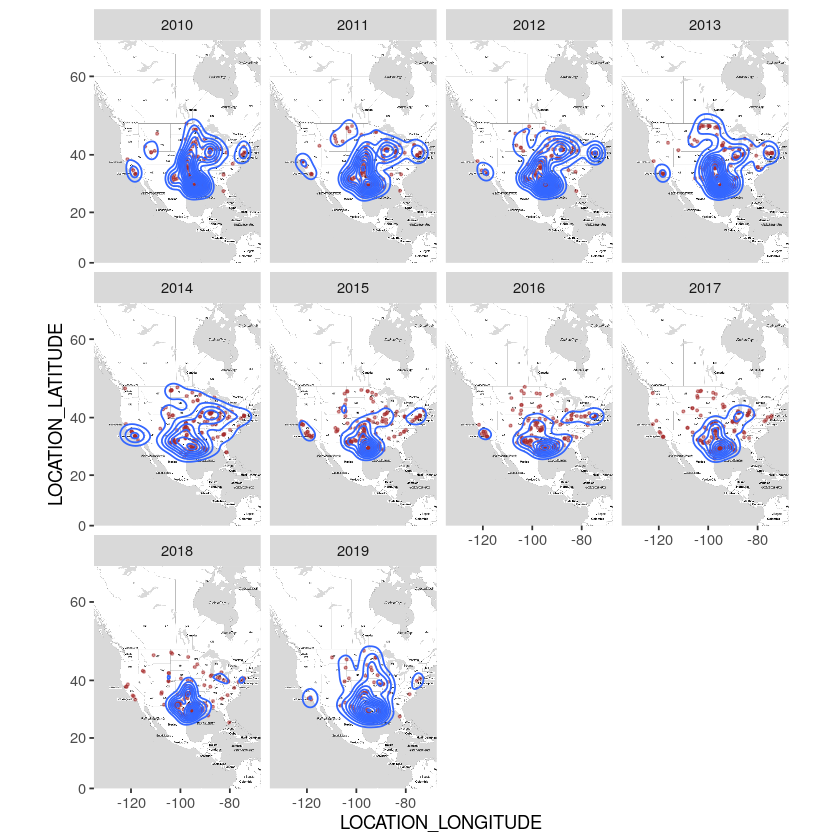

In [8]:
ggmap(map, base_layer = ggplot(significant_incidents, aes(LOCATION_LONGITUDE, LOCATION_LATITUDE))) +
    geom_point(size = 0.5, alpha = 0.5, scatter=0.5, color = "brown") +
    geom_density_2d(rows = 3, ncol = 4) +
    facet_wrap(~YEAR, nrow=3)

## Visualize incident locations (Gulf of Mexico)

In [9]:
gulf_map <- get_map("gulf of mexico", zoom = 6, source = "stamen", maptype = "toner-lite", crop = FALSE)

Source : https://maps.googleapis.com/maps/api/staticmap?center=gulf%20of%20mexico&zoom=6&size=640x640&scale=2&maptype=terrain&key=xxx-hoo6w1-zxo
Source : https://maps.googleapis.com/maps/api/geocode/json?address=gulf+of+mexico&key=xxx-hoo6w1-zxo
Source : http://tile.stamen.com/toner-lite/6/14/26.png
Source : http://tile.stamen.com/toner-lite/6/15/26.png
Source : http://tile.stamen.com/toner-lite/6/16/26.png
Source : http://tile.stamen.com/toner-lite/6/17/26.png
Source : http://tile.stamen.com/toner-lite/6/14/27.png
Source : http://tile.stamen.com/toner-lite/6/15/27.png
Source : http://tile.stamen.com/toner-lite/6/16/27.png
Source : http://tile.stamen.com/toner-lite/6/17/27.png
Source : http://tile.stamen.com/toner-lite/6/14/28.png
Source : http://tile.stamen.com/toner-lite/6/15/28.png
Source : http://tile.stamen.com/toner-lite/6/16/28.png
Source : http://tile.stamen.com/toner-lite/6/17/28.png


Warning message:
“Ignoring unknown parameters: scatter”Warning message:
“Removed 1010 rows containing missing values (geom_point).”

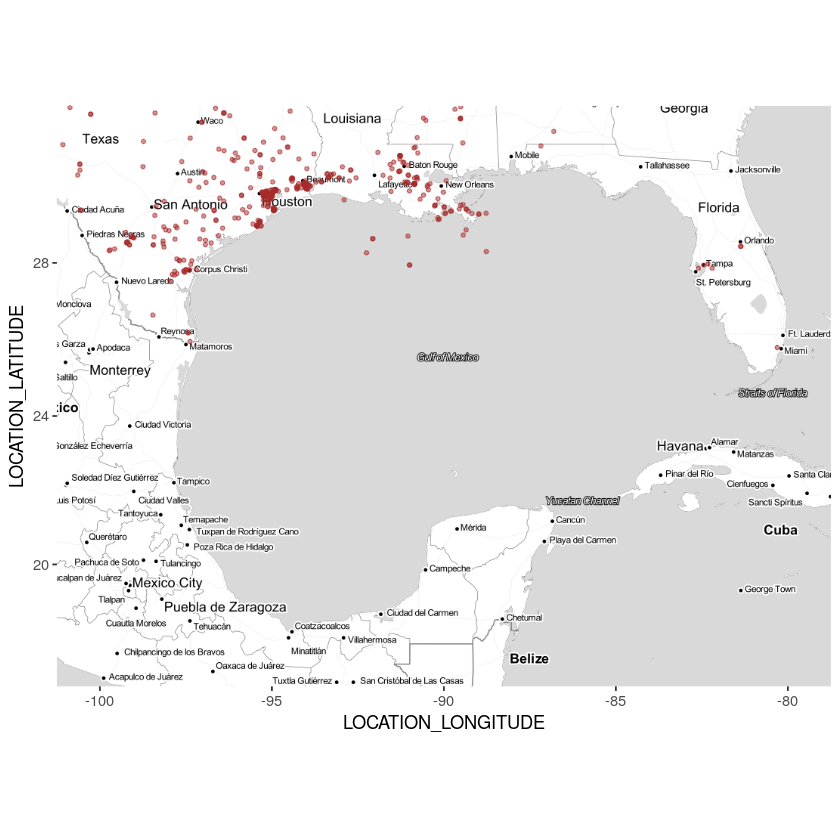

In [10]:
ggmap(gulf_map, base_layer = ggplot(significant_incidents, aes(LOCATION_LONGITUDE, LOCATION_LATITUDE))) +
    geom_point(size = 0.9, alpha = 0.5, scatter=0.6, color = "brown")

## Visualize locations by type

Warning message:
“Ignoring unknown parameters: scatter”Warning message:
“Ignoring unknown parameters: rows, ncol”Warning message:
“Removed 8 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 8 rows containing missing values (geom_point).”

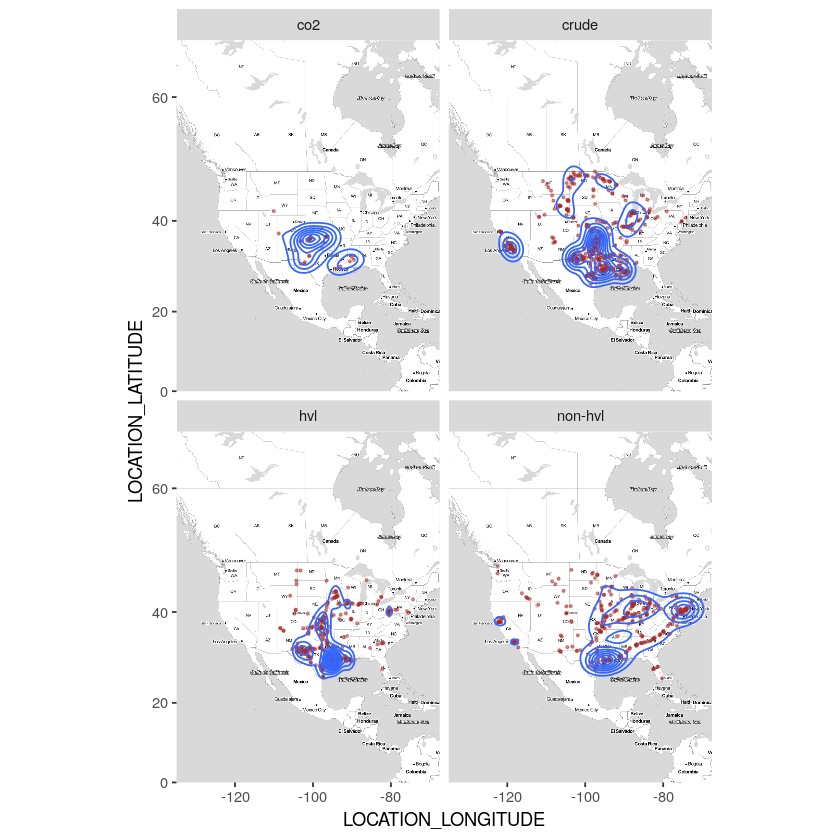

In [11]:
ggmap(map, base_layer = ggplot(significant_incidents, aes(LOCATION_LONGITUDE, LOCATION_LATITUDE))) +
    geom_point(size = 0.5, alpha = 0.5, scatter=0.5, color = "brown") +
    geom_density_2d(rows = 3, ncol = 4) +
    facet_wrap(~COMMODITY)

In [12]:
table(incidents$COMMODITY)


    co2   crude     hvl non-hvl 
     54    1930     598    1237 

## Summary

It seems the number of incidents that occur (or are reported) on offshore pipelines is negligable. We can probably accomplish more accurate modeling results if we exclude offshore pipelines.